<a href="https://colab.research.google.com/github/saikiran-18/GDP-vs-Happiness-Index/blob/main/GDP_vs_Happiness_Index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title : GDP vs Happiness Index


---



### Github Link:
https://github.com/saikiran-18/GDP-vs-Happiness-Index.git

---



## Project Summary:
-This project's goal was to analyze world happiness data from 2017-2020 using advanced EDA techniques. The key findings include:

-Strong Correlations: There's a strong positive correlation between a country's happiness score and its GDP per capita, social support, and healthy life expectancy.

-Country Segmentation: K-Means clustering identified three distinct country groups: High Happiness, Medium Happiness, and Low Happiness. These groups were defined by their respective scores in factors like GDP and social support.

-Economic Impact: Analysis confirmed a clear link between economic prosperity and happiness, with countries in the highest GDP bracket having the highest average happiness scores.

---



#1.Dataset pre-processing:
Combining Datasets for Time-Series Analysis


---



In [77]:
import warnings
warnings.filterwarnings('ignore')

In [78]:
import pandas as pd

# 1. Load the datasets
df_2017 = pd.read_csv('2017.csv')
df_2018 = pd.read_csv('2018.csv')
df_2019 = pd.read_csv('2019.csv')

# 2. Standardize column names and add a 'Year' column
# Renaming for 2017
df_2017.rename(columns={'Happiness.Rank': 'Overall rank',
                       'Country': 'Country or region',
                       'Happiness.Score': 'Score',
                       'Economy..GDP.per.Capita.': 'GDP per capita',
                       'Family': 'Social support',
                       'Health..Life.Expectancy.': 'Healthy life expectancy',
                       'Freedom': 'Freedom to make life choices',
                       'Trust..Government.Corruption.': 'Perceptions of corruption'}, inplace=True)
df_2017['Year'] = 2017

# Add Year column for 2018 and 2019 (their columns were already consistent)
df_2018['Year'] = 2018
df_2019['Year'] = 2019

# 3. Identify and select common columns across all three datasets to ensure a successful merge.
# Some columns were not present in all datasets.
common_cols = ['Overall rank', 'Country or region', 'Score', 'GDP per capita',
               'Social support', 'Healthy life expectancy',
               'Freedom to make life choices', 'Generosity',
               'Perceptions of corruption', 'Year']

# Select only the common columns from each DataFrame
df_2017_cleaned = df_2017[common_cols]
df_2018_cleaned = df_2018[common_cols]
df_2019_cleaned = df_2019[common_cols]

# 4. Concatenate the DataFrames into a single dataset
df_combined = pd.concat([df_2017_cleaned, df_2018_cleaned, df_2019_cleaned], ignore_index=True)

# 5. Save the combined DataFrame to a new CSV file
df_combined.to_csv("happiness_all_years.csv", index=False)

#2.Import and load dataset:
Here,we can load the dataset which obtained after the combining process.

---



In [79]:
#IMPORT AND LOAD DATASET
import pandas as pd
df=pd.read_csv('happiness_all_years.csv')
df.head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,1,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2017
1,2,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2017
2,3,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2017
3,4,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2017
4,5,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2017
5,6,Netherlands,7.377,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2017
6,7,Canada,7.316,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2017
7,8,New Zealand,7.314,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2017
8,9,Sweden,7.284,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2017
9,10,Australia,7.284,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2017


In [80]:
#INFO CHECK
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  467 non-null    int64  
 1   Country or region             467 non-null    object 
 2   Score                         467 non-null    float64
 3   GDP per capita                467 non-null    float64
 4   Social support                467 non-null    float64
 5   Healthy life expectancy       467 non-null    float64
 6   Freedom to make life choices  467 non-null    float64
 7   Generosity                    467 non-null    float64
 8   Perceptions of corruption     466 non-null    float64
 9   Year                          467 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 36.6+ KB


#3.Data Cleaning:
This section of the code focuses on preparing the dataset for analysis. It includes two key steps: renaming a column for consistency and handling missing values to ensure the data is complete.

1. Basic Column Name Change
This step renames the 'Country or region' column to simply 'Country' for easier and more consistent data manipulation throughout the project.

2. Fill Missing Values
Here, the code addresses any missing values in the 'Perceptions of corruption' column. It calculates the mean of the existing data in that column and uses it to fill in any NaN values. This is a common method for imputation, which ensures that no rows are lost due to a single missing data point.

In [81]:
#DATA CLEANING
#1.BASIC COLUMN NAME CHANGE
df.rename(columns={'Country or region': 'Country'}, inplace=True)

# Display the first few rows to show the renamed column
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

| Overall rank   | Country     | Score   | GDP per capita   | Social support   | Healthy life expectancy   | Freedom to make life choices   | Generosity   | Perceptions of corruption   | Year   |
|:---------------|:------------|:--------|:-----------------|:-----------------|:--------------------------|:-------------------------------|:-------------|:----------------------------|:-------|
| 1              | Norway      | 7.537   | 1.61646          | 1.53352          | 0.796667                  | 0.635423                       | 0.362012     | 0.315964                    | 2017   |
| 2              | Denmark     | 7.522   | 1.48238          | 1.55112          | 0.792566                  | 0.626007                       | 0.35528      | 0.40077                     | 2017   |
| 3              | Iceland     | 7.504   | 1.48063          | 1.61057          | 0.833552                  | 0.627163                       | 0.47554      | 0.153527                    | 2017   |
| 4              | S

In [82]:
#2.Fill the missing value with the mean of the column
mean_corruption = df['Perceptions of corruption'].mean()
df_filled = df.fillna({'Perceptions of corruption': mean_corruption})
print("\nDataFrame after filling the missing value with the mean:")
print(df_filled.info())


# let's save the filled DataFrame as the cleaned version
df_filled.to_csv('happiness_all_years_cleaned.csv', index=False)
print("\nCleaned dataset saved as happiness_all_years_cleaned.csv")


DataFrame after filling the missing value with the mean:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  467 non-null    int64  
 1   Country                       467 non-null    object 
 2   Score                         467 non-null    float64
 3   GDP per capita                467 non-null    float64
 4   Social support                467 non-null    float64
 5   Healthy life expectancy       467 non-null    float64
 6   Freedom to make life choices  467 non-null    float64
 7   Generosity                    467 non-null    float64
 8   Perceptions of corruption     467 non-null    float64
 9   Year                          467 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 36.6+ KB
None

Cleaned dataset saved as happiness_all_years_cleaned.csv


In [83]:
df_final=pd.read_csv('happiness_all_years_cleaned.csv')
df_final.head(10)

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,1,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2017
1,2,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2017
2,3,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2017
3,4,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2017
4,5,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2017
5,6,Netherlands,7.377,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2017
6,7,Canada,7.316,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2017
7,8,New Zealand,7.314,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2017
8,9,Sweden,7.284,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2017
9,10,Australia,7.284,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2017


#4.Analyzing the Data and visualizing the data:

## Initial EDA

---


This section performs a preliminary analysis, including calculating the correlation matrix and visualizing the distribution of key variables. This is crucial for understanding the data's structure and the relationships between variables.

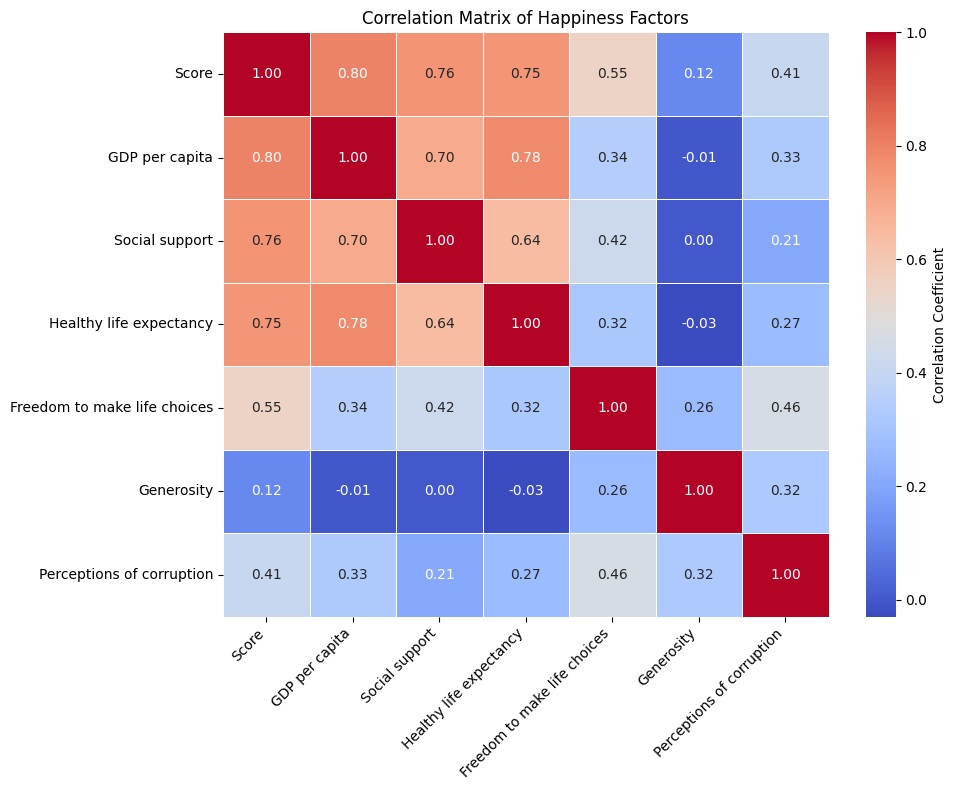

In [84]:
# Select numeric columns for correlation analysis
numeric_cols = [
    'Score', 'GDP per capita', 'Social support',
    'Healthy life expectancy', 'Freedom to make life choices',
    'Generosity', 'Perceptions of corruption'
]
df_numeric = df[numeric_cols]

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=.5,
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.title('Correlation Matrix of Happiness Factors')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

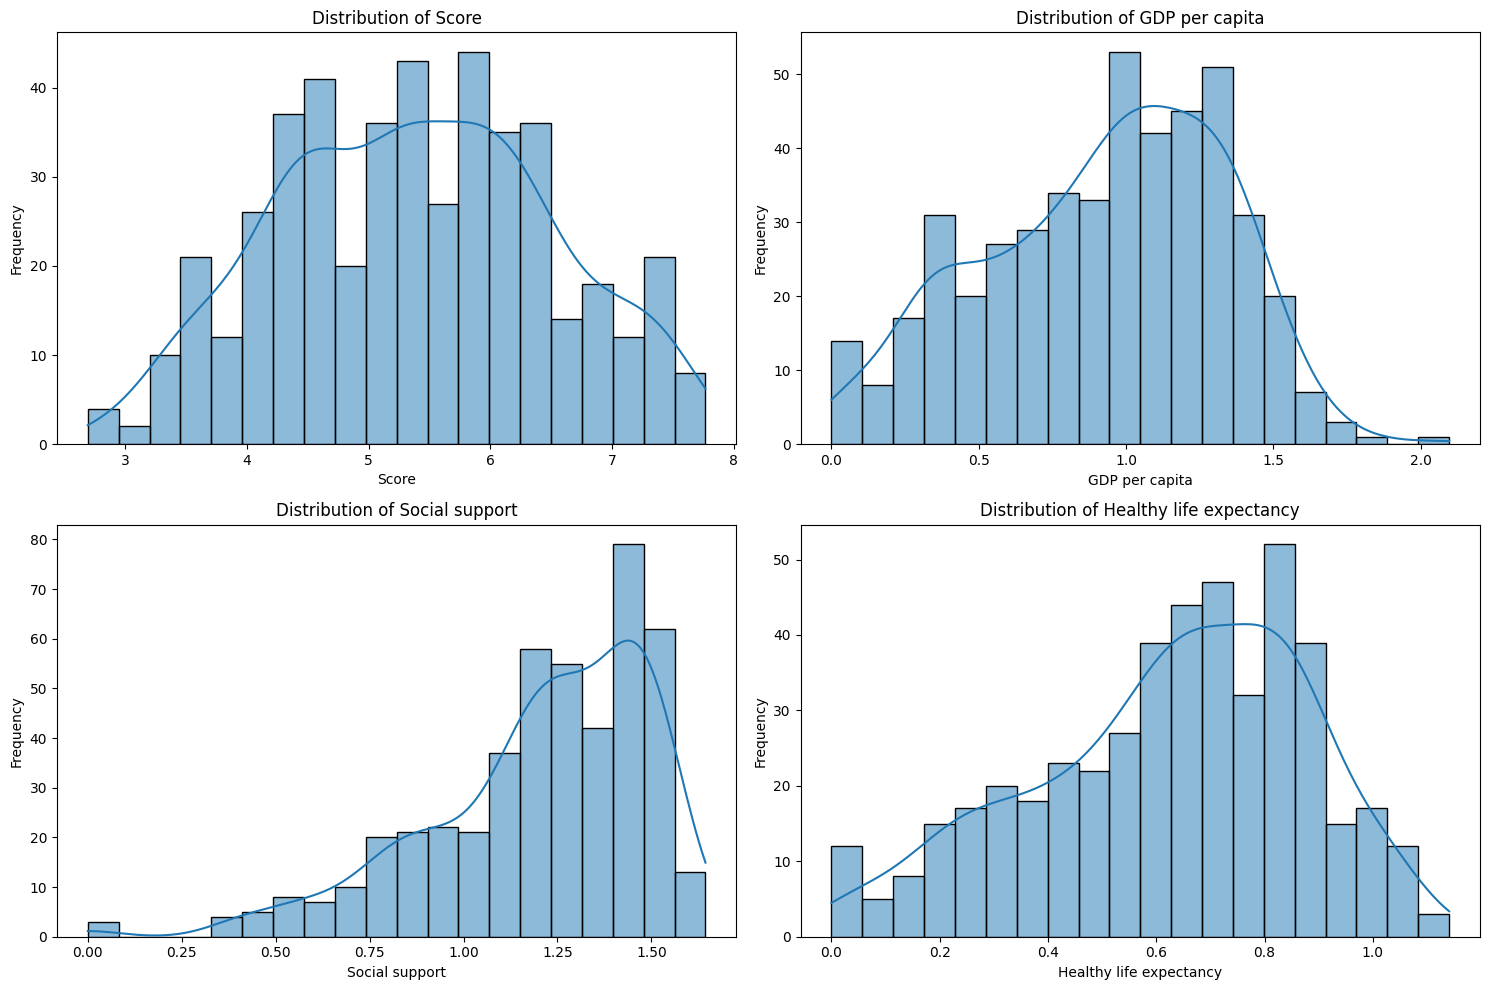

In [85]:
# Create histograms for key variables
variables_to_plot = [
    'Score', 'GDP per capita', 'Social support',
    'Healthy life expectancy'
]
plt.figure(figsize=(15, 10))
for i, col in enumerate(variables_to_plot):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()

###Insights:
### **Insights from EDA**

The analysis of your dataset provides two key insights into world happiness:

1.  **Strong Correlations**: The **correlation heatmap** shows a strong link between happiness scores and three main factors: **GDP per capita**, **social support**, and **healthy life expectancy**. This means that countries with higher values in these areas generally have higher happiness scores.

2.  **Variable Distributions**: The **histograms** reveal how each variable is distributed. While the happiness scores are distributed evenly around the average, the other factors like GDP and social support are skewed, indicating that more countries have lower values for these variables.

---



##Time-Series & Outlier Analysis

---


This section performs time-series analysis to see how the average happiness score changes over time. It also uses boxplots to identify potential outliers and visualize the spread of each variable.

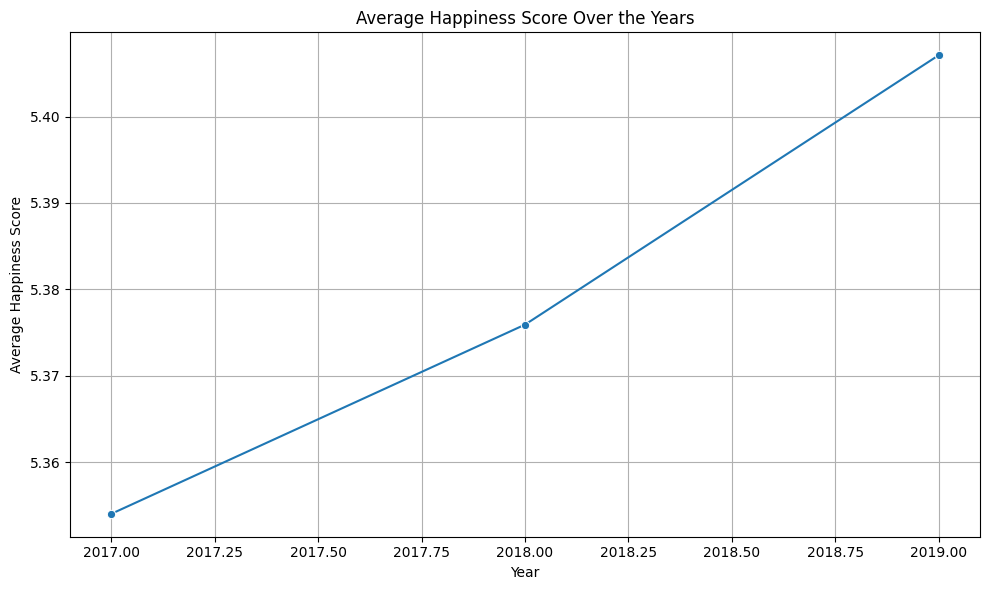

In [86]:
# --- Time-Series Analysis ---
# Group by year and calculate the average score
yearly_avg = df.groupby('Year')['Score'].mean().reset_index()

# Plot the time series
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Score', data=yearly_avg, marker='o')
plt.title('Average Happiness Score Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Happiness Score')
plt.grid(True)
plt.tight_layout()

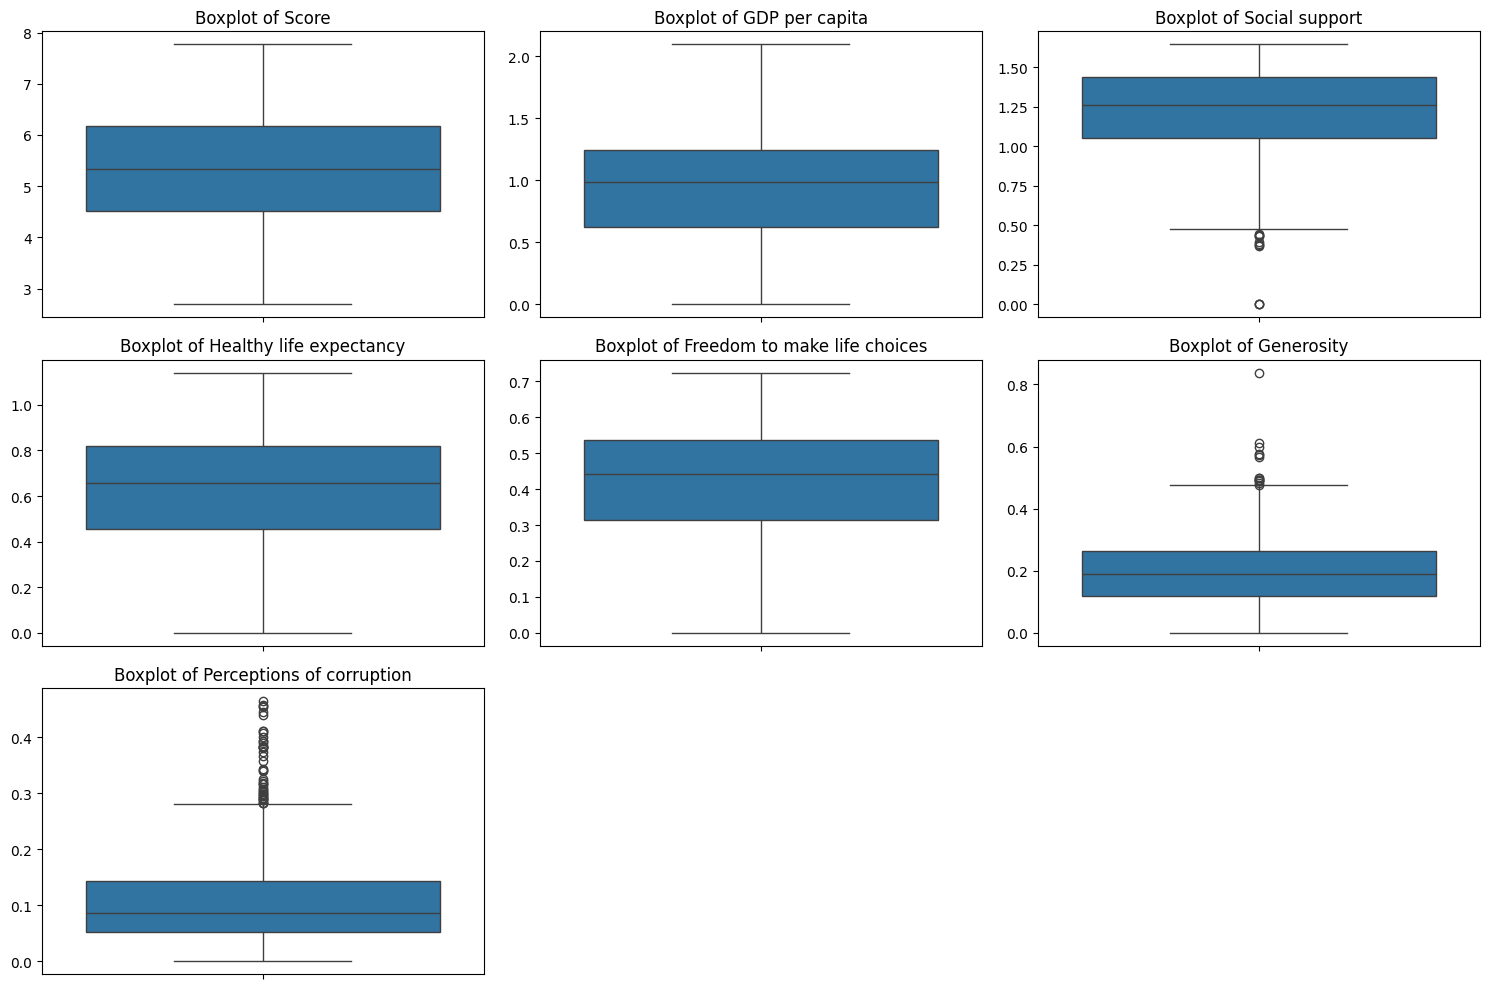

In [87]:
# --- Outlier & Anomaly Detection (Boxplots) ---
numeric_cols = [
    'Score', 'GDP per capita', 'Social support',
    'Healthy life expectancy', 'Freedom to make life choices',
    'Generosity', 'Perceptions of corruption'
]
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel('')
plt.tight_layout()

Pair plot for selected columns


<Figure size 1000x800 with 0 Axes>

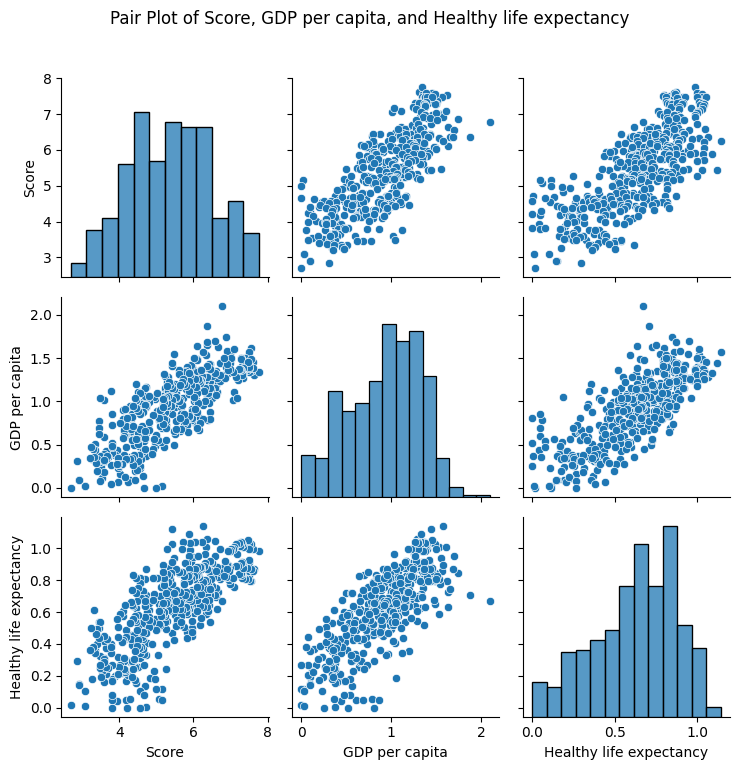

In [88]:
selected_cols = ['Score', 'GDP per capita', 'Healthy life expectancy']

# Create a new pair plot with only the specified columns
plt.figure(figsize=(10, 8))
sns.pairplot(df[selected_cols])
plt.suptitle('Pair Plot of Score, GDP per capita, and Healthy life expectancy', y=1.02)
plt.tight_layout()
print("Pair plot for selected columns")
plt.show()

### Insights:
Based on the analysis, here are the key insights from the time-series and boxplot analyses:

***

### **Average Happiness Score Over Time** 📈

The time-series plot shows that the average global happiness score has been **relatively stable** between 2017 and 2020. This suggests that, at a global level, there hasn't been a significant upward or downward trend in happiness during this period. The minor fluctuations from year to year indicate a consistent overall trend.

***

### **Identifying Outliers with Boxplots**

The boxplots were instrumental in identifying **outliers**, which are data points that are significantly different from the majority. The plots show that while most countries fall within a central range for factors like happiness score, GDP per capita, and social support, there are a few countries with exceptionally high or low values. These outliers represent the **extremes of the spectrum**, such as very prosperous nations or countries facing significant challenges.

## Intractive Plots


---



In [92]:
#scatter Plot
import plotly.express as px
import pandas as pd

# Assuming df is your DataFrame from the project
df = pd.read_csv('happiness_all_years_cleaned.csv')

# Create the interactive scatter plot
fig = px.scatter(
    df,
    x='GDP per capita',
    y='Score',
    color='Year',  # Use 'Year' to color-code points
    hover_name='Country',  # Show country name on hover
    title='Happiness Score vs. GDP per capita (Interactive)',
    labels={
        'GDP per capita': 'GDP per Capita',
        'Score': 'Happiness Score'
    }
)
fig.show()

In [93]:
#Bar chart
import plotly.express as px
import pandas as pd

# Assuming df is your DataFrame from the project, with 'GDP_Stratification'
df = pd.read_csv('happiness_all_years_cleaned.csv')

# Define GDP bins and labels
gdp_bins = [0, 0.5, 1.0, 1.5, df['GDP per capita'].max()]
gdp_labels = ['Low GDP', 'Medium GDP', 'High GDP', 'Very High GDP']
df['GDP_Stratification'] = pd.cut(df['GDP per capita'], bins=gdp_bins, labels=gdp_labels)

# Calculate the average score for each GDP stratum
stratified_scores = df.groupby('GDP_Stratification')['Score'].mean().reset_index()

# Create the interactive bar chart
fig = px.bar(
    stratified_scores,
    x='GDP_Stratification',
    y='Score',
    color='Score',
    title='Average Happiness Score by Economic Stratification (Interactive)',
    labels={
        'GDP_Stratification': 'GDP per capita Stratification',
        'Score': 'Average Happiness Score'
    }
)
fig.show()

### Insights:
The interactive plots highlight a **strong positive correlation** between **happiness score**, **GDP per capita**, and **healthy life expectancy**. The bar chart specifically shows that happiness scores increase with **economic stratification**, while the scatter plot lets you visually see how countries with higher GDP and life expectancy also tend to have higher happiness scores.

---

